In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading dataset
cd = pd.read_csv('/content/Company_Data.csv')

In [3]:
cd.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


#Data Visualization

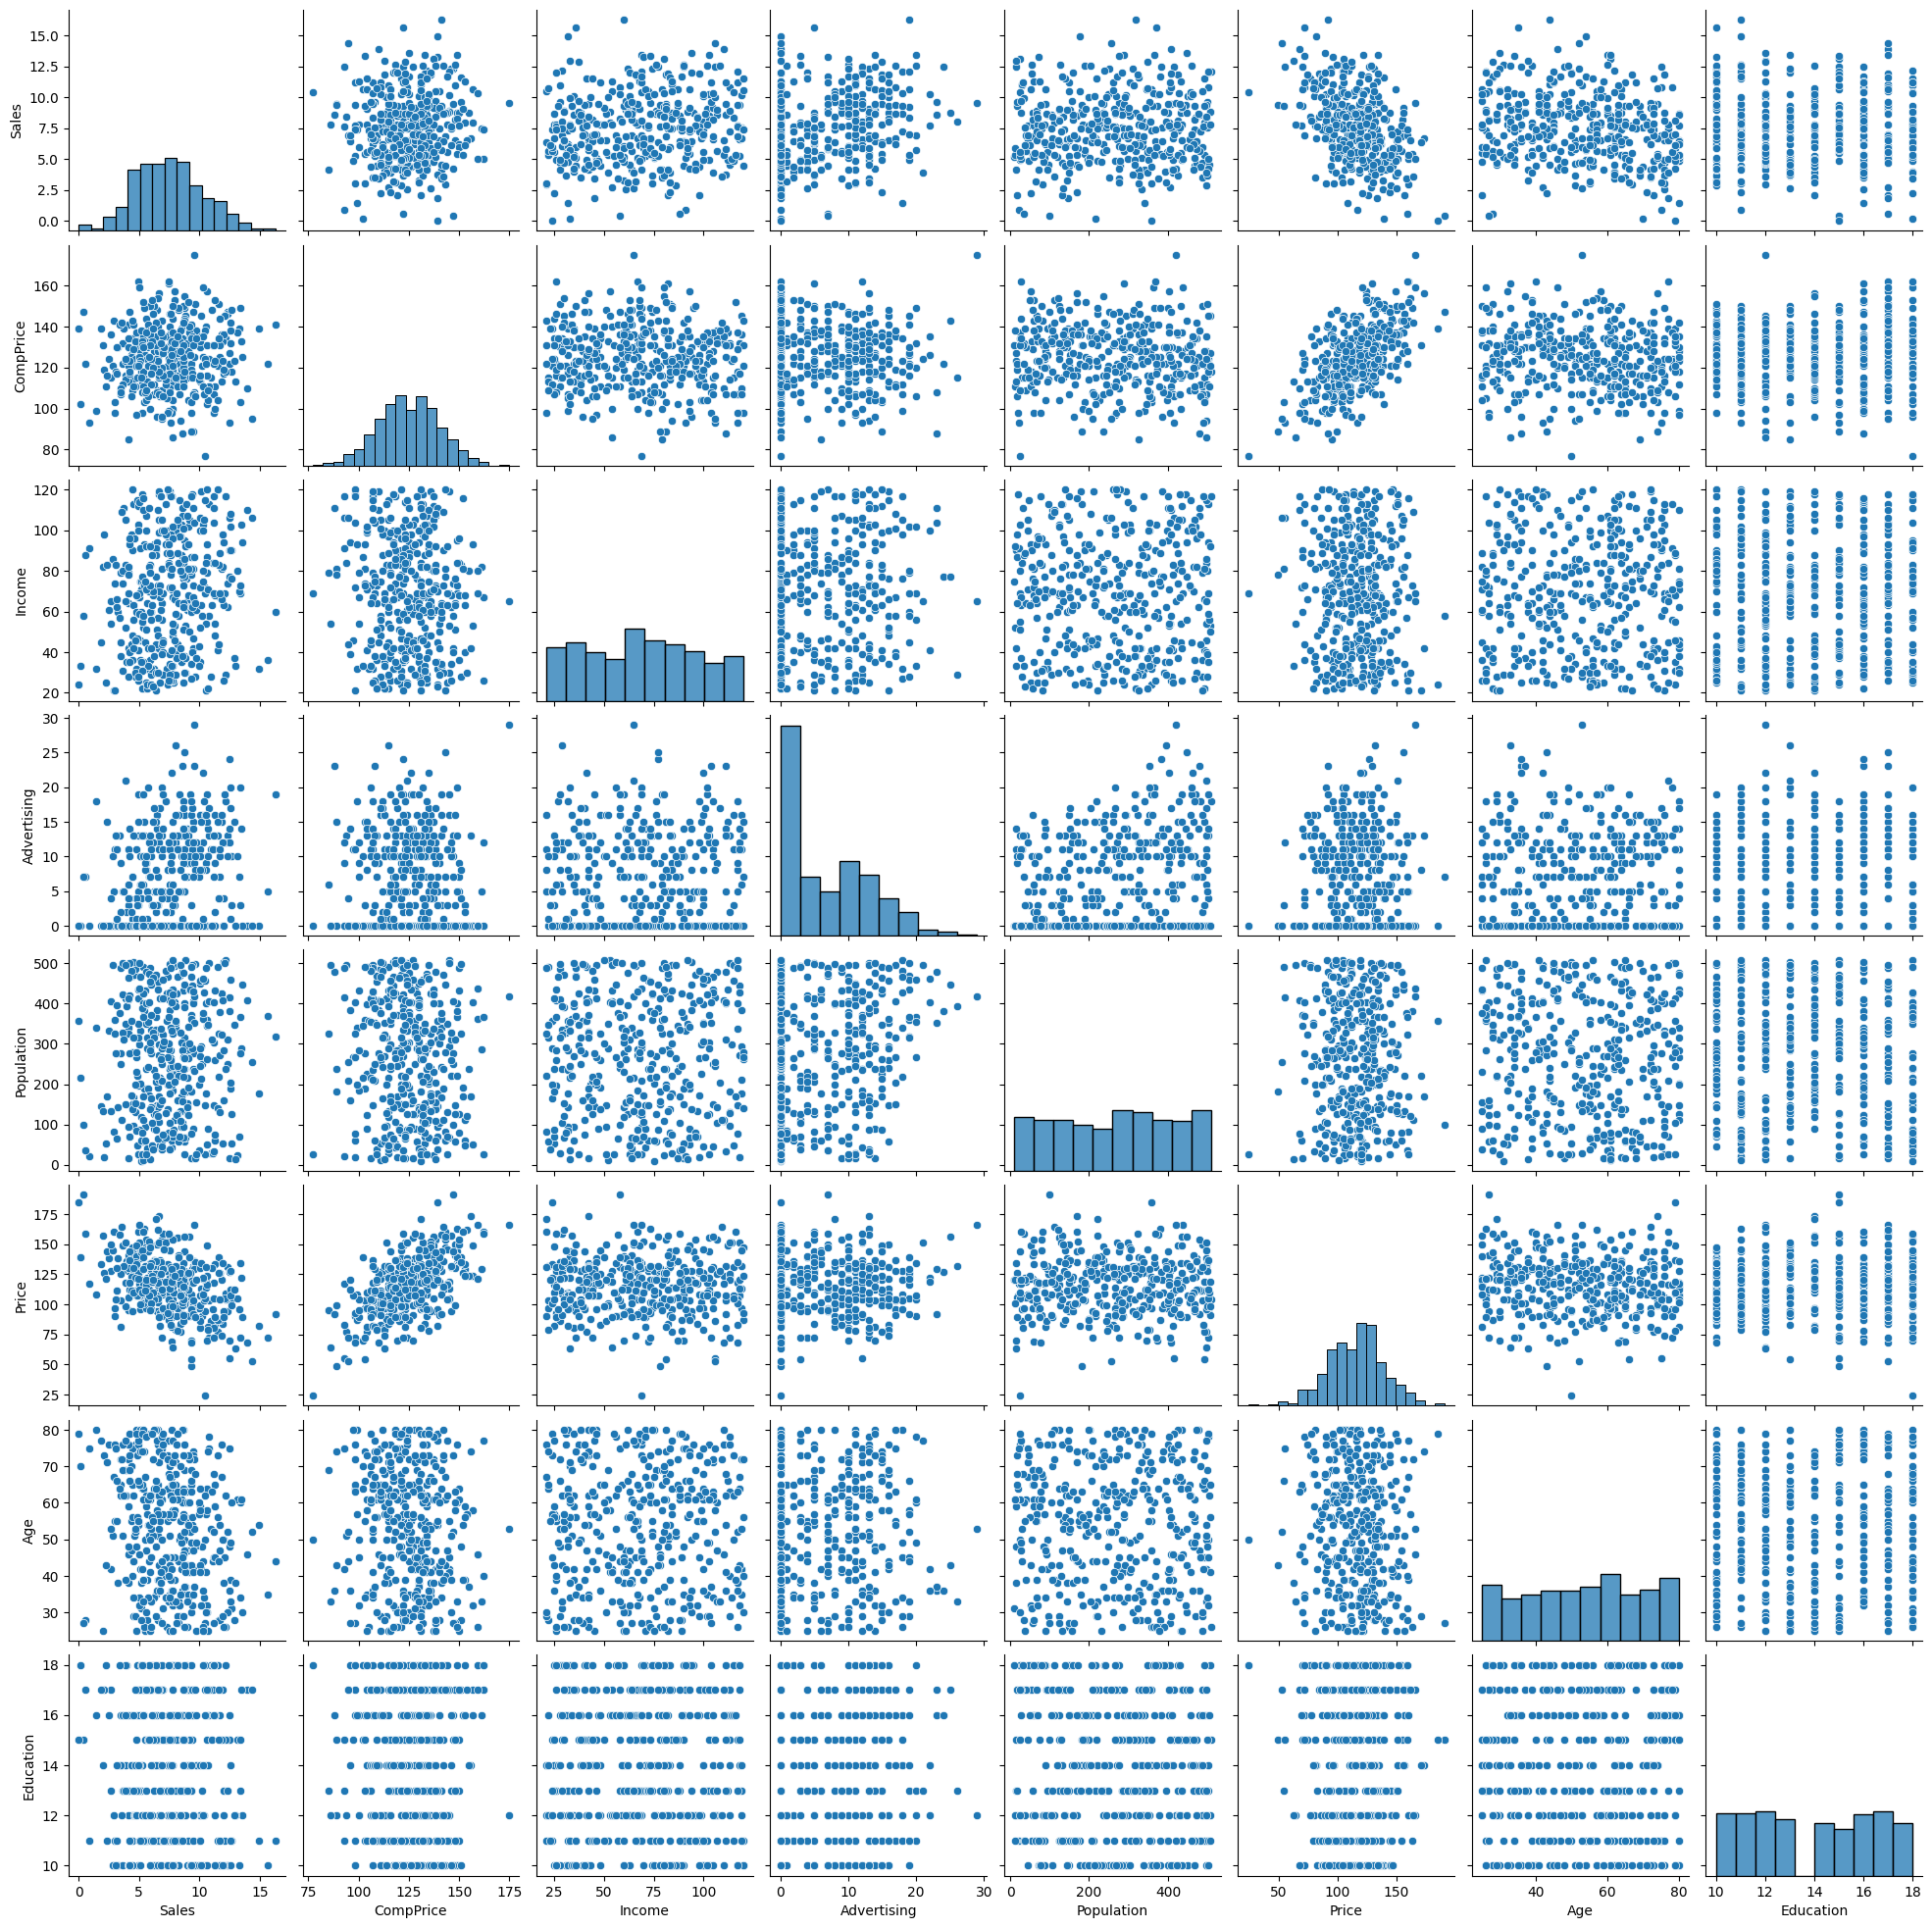

In [5]:
import seaborn as sns
sns.pairplot(cd)

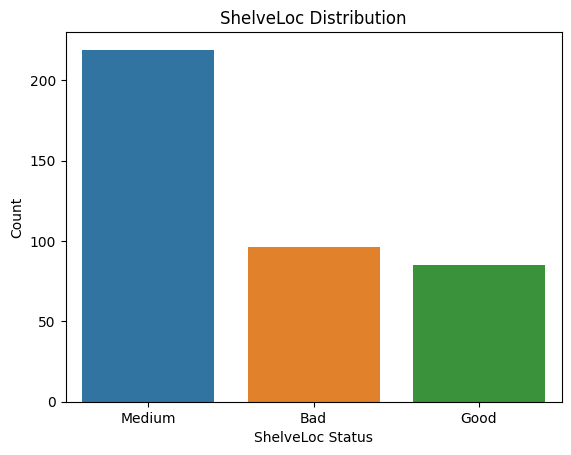

In [6]:
ShelveLoc_counts = cd['ShelveLoc'].value_counts()

sns.barplot(x=ShelveLoc_counts.index, y=ShelveLoc_counts.values)
plt.xlabel('ShelveLoc Status')
plt.ylabel('Count')
plt.title('ShelveLoc Distribution')
plt.show()

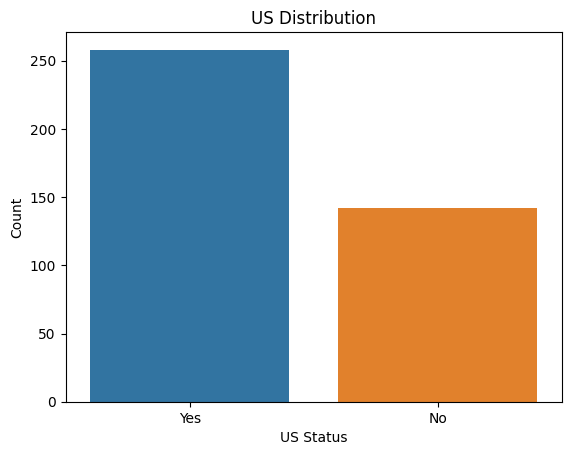

In [7]:
US_counts = cd['US'].value_counts()

sns.barplot(x=US_counts.index, y=US_counts.values)
plt.xlabel('US Status')
plt.ylabel('Count')
plt.title('US Distribution')
plt.show()

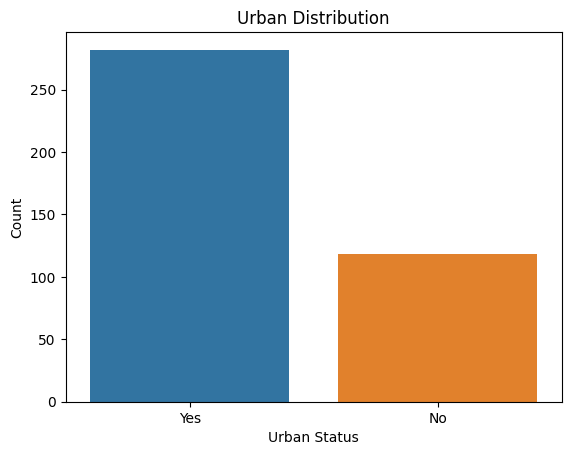

In [8]:
Urban_counts = cd['Urban'].value_counts()

sns.barplot(x=Urban_counts.index, y=Urban_counts.values)
plt.xlabel('Urban Status')
plt.ylabel('Count')
plt.title('Urban Distribution')
plt.show()


In [9]:
corr = cd.corr()

<ipython-input-9-bd4c1bb6c580>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cd.corr()


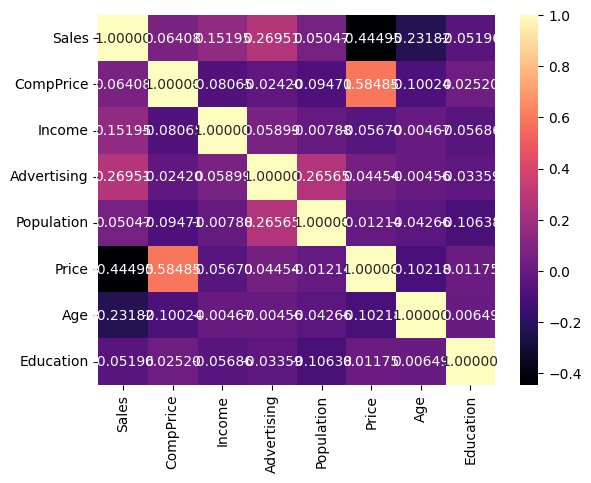

In [10]:
sns.heatmap(corr, cmap='magma', annot=True, fmt=".5f")
plt.show()

converting numerical to categorical

In [11]:
cd['Sales'] = pd.cut(x=cd['Sales'],bins=[0, 7, 14, 20], labels=['Low','Medium', 'High'], right = False)
cd['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395    Medium
396       Low
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

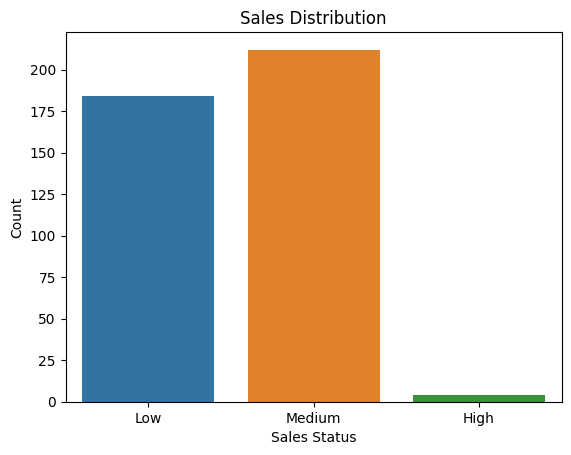

In [12]:
Sales_counts = cd['Sales'].value_counts()

sns.barplot(x=Sales_counts.index, y=Sales_counts.values)
plt.xlabel('Sales Status')
plt.ylabel('Count')
plt.title('Sales Distribution')
plt.show()

In [13]:
cd['Sales'].value_counts()

Medium    212
Low       184
High        4
Name: Sales, dtype: int64

In [14]:
 cd.describe()

CompPrice      Income  Advertising  Population       Price  \
count  400.000000  400.000000   400.000000  400.000000  400.000000   
mean   124.975000   68.657500     6.635000  264.840000  115.795000   
std     15.334512   27.986037     6.650364  147.376436   23.676664   
min     77.000000   21.000000     0.000000   10.000000   24.000000   
25%    115.000000   42.750000     0.000000  139.000000  100.000000   
50%    125.000000   69.000000     5.000000  272.000000  117.000000   
75%    135.000000   91.000000    12.000000  398.500000  131.000000   
max    175.000000  120.000000    29.000000  509.000000  191.000000   

              Age   Education  
count  400.000000  400.000000  
mean    53.322500   13.900000  
std     16.200297    2.620528  
min     25.000000   10.000000  
25%     39.750000   12.000000  
50%     54.500000   14.000000  
75%     66.000000   16.000000  
max     80.000000   18.000000

In [15]:
cd['CompPrice'] = pd.cut(x=cd['CompPrice'],bins=[77, 110, 143, 186], labels=['Low','Medium', 'High'], right = False)
cd['Income'] = pd.cut(x=cd['Income'],bins=[21, 47, 81, 132], labels=['Low','Medium', 'High'], right = False)
cd['Advertising'] = pd.cut(x=cd['Advertising'],bins=[0, 20, 40, 60], labels=['Low','Medium', 'High'], right = False)
cd['Population'] = pd.cut(x=cd['Population'],bins=[10, 140, 300, 480], labels=['Low','Medium', 'High'], right = False)
cd['Price'] = pd.cut(x=cd['Price'],bins=[24, 50, 106, 142], labels=['Low','Medium', 'High'], right = False)
cd['Age'] = pd.cut(x=cd['Age'],bins=[25, 50, 60, 90], labels=['Low','Medium', 'High'], right = False)
cd['Education'] = pd.cut(x=cd['Education'],bins=[10, 13, 17, 18], labels=['Low','Medium', 'High'], right = False)

In [16]:
cd.head()


Sales CompPrice  Income Advertising Population   Price ShelveLoc     Age  \
0  Medium    Medium  Medium         Low     Medium    High       Bad     Low   
1  Medium    Medium  Medium         Low     Medium  Medium      Good    High   
2  Medium    Medium     Low         Low     Medium  Medium    Medium  Medium   
3  Medium    Medium    High         Low       High  Medium    Medium  Medium   
4     Low    Medium  Medium         Low       High    High       Bad     Low   

  Education Urban   US  
0      High   Yes  Yes  
1       Low   Yes  Yes  
2       Low   Yes  Yes  
3    Medium   Yes  Yes  
4    Medium   Yes   No

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cd['Sales'] = label_encoder.fit_transform(cd['Sales'])
cd['CompPrice'] = label_encoder.fit_transform(cd['CompPrice'])
cd['Income'] = label_encoder.fit_transform(cd['Income'])
cd['Advertising'] = label_encoder.fit_transform(cd['Advertising'])
cd['Population'] = label_encoder.fit_transform(cd['Population'])
cd['Price'] = label_encoder.fit_transform(cd['Price'])
cd['ShelveLoc'] = label_encoder.fit_transform(cd['ShelveLoc'])
cd['Age'] = label_encoder.fit_transform(cd['Age'])
cd['Education'] = label_encoder.fit_transform(cd['Education'])
cd['Urban'] = label_encoder.fit_transform(cd['Urban'])
cd['US'] = label_encoder.fit_transform(cd['US'])

In [18]:
cd

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        2          2       2            0           2      0          0    1   
1        2          2       2            0           2      2          1    0   
2        2          2       1            0           2      2          2    2   
3        2          2       0            0           0      2          2    2   
4        1          2       2            0           0      0          0    1   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395      2          2       0            0           2      0          1    1   
396      1          2       1            0           1      0          2    2   
397      2          0       1            0           0      3          2    1   
398      1          1       2            0           2      2          0    2   
399      2          2       1            0           1      0          1    1   

     Education  Urban  US  
0            0      1   1  
1            1      1   1  
2            1      1   1  
3            2      1   1  
4            2      1   0  
..         ...    ...  ..  
395          2      1   1  
396          1      0   1  
397          3      1   1  
398          1      1   1  
399          2      1   1  

[400 rows x 11 columns]

In [19]:
x = cd.drop('Sales', axis = 1)
y = cd['Sales']

In [20]:
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0            2       2            0           2      0          0    1   
1            2       2            0           2      2          1    0   
2            2       1            0           2      2          2    2   
3            2       0            0           0      2          2    2   
4            2       2            0           0      0          0    1   
..         ...     ...          ...         ...    ...        ...  ...   
395          2       0            0           2      0          1    1   
396          2       1            0           1      0          2    2   
397          0       1            0           0      3          2    1   
398          1       2            0           2      2          0    2   
399          2       1            0           1      0          1    1   

     Education  Urban  US  
0            0      1   1  
1            1      1   1  
2            1      1   1  
3            2      1   1  
4            2      1   0  
..         ...    ...  ..  
395          2      1   1  
396          1      0   1  
397          3      1   1  
398          1      1   1  
399          2      1   1  

[400 rows x 10 columns]

In [21]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    2
396    1
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 32)

In [23]:
x_train

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
124          2       0            0           2      0          1    0   
103          2       0            0           0      2          0    0   
172          1       0            0           1      0          1    1   
199          2       0            0           0      0          2    0   
14           1       0            0           2      0          1    2   
..         ...     ...          ...         ...    ...        ...  ...   
380          1       2            0           1      2          2    0   
310          0       2            1           0      3          2    2   
389          2       1            0           0      0          2    1   
43           2       1            0           1      0          2    2   
215          2       0            0           2      3          0    0   

     Education  Urban  US  
124          2      1   0  
103          0      1   1  
172          2      1   1  
199          2      1   1  
14           3      1   1  
..         ...    ...  ..  
380          0      1   1  
310          1      1   1  
389          1      1   1  
43           2      1   1  
215          1      1   1  

[280 rows x 10 columns]

In [24]:
x_test

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
223          2       1            0           2      0          2    0   
145          0       2            0           1      0          2    1   
146          2       0            0           0      0          0    1   
366          2       2            0           0      0          2    2   
268          2       2            0           1      2          2    1   
..         ...     ...          ...         ...    ...        ...  ...   
368          1       1            0           0      2          1    0   
63           2       0            0           2      2          2    0   
391          0       2            0           1      0          0    2   
177          2       2            0           2      2          2    1   
27           1       0            0           1      0          2    0   

     Education  Urban  US  
223          2      1   1  
145          0      1   1  
146          2      1   0  
366          1      0   1  
268          1      1   0  
..         ...    ...  ..  
368          2      0   1  
63           2      1   1  
391          2      1   0  
177          0      1   1  
27           0      1   0  

[120 rows x 10 columns]

In [25]:
y_train

124    2
103    1
172    2
199    1
14     2
      ..
380    2
310    2
389    2
43     1
215    1
Name: Sales, Length: 280, dtype: int64

In [26]:
y_test

223    1
145    2
146    1
366    1
268    1
      ..
368    2
63     2
391    1
177    2
27     1
Name: Sales, Length: 120, dtype: int64

C5.0 Algorithm

In [27]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[5] <= 0.5\nentropy = 1.091\nsamples = 280\nvalue = [4, 130, 146]'),
 Text(0.25, 0.625, 'x[1] <= 0.5\nentropy = 0.828\nsamples = 69\nvalue = [0, 51, 18]'),
 Text(0.125, 0.375, 'x[4] <= 2.5\nentropy = 0.985\nsamples = 28\nvalue = [0, 16, 12]'),
 Text(0.0625, 0.125, 'entropy = 0.999\nsamples = 23\nvalue = [0, 11, 12]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.375, 0.375, 'x[6] <= 0.5\nentropy = 0.601\nsamples = 41\nvalue = [0, 35, 6]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.75\nsamples = 28\nvalue = [0, 22, 6]'),
 Text(0.75, 0.625, 'x[5] <= 1.5\nentropy = 1.077\nsamples = 211\nvalue = [4, 79, 128]'),
 Text(0.625, 0.375, 'x[4] <= 2.5\nentropy = 0.887\nsamples = 62\nvalue = [4, 8, 50]'),
 Text(0.5625, 0.125, 'entropy = 0.693\nsamples = 53\nvalue = [4, 3, 46]'),
 Text(0.6875, 0.125, 'entropy = 0.991\nsamples = 9\nvalue = [0, 5, 4]'),
 Text(0.875, 0.375, 'x[4] <= 2.

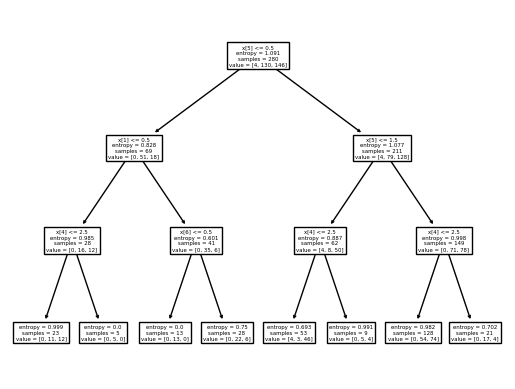

In [28]:
tree.plot_tree(model1)

In [29]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20, 8), dpi=1000)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [30]:
#checking accuracy training data
y_pred_train1 = model1.predict(x_train)
pd.Series(y_pred_train1).value_counts()

2    204
1     76
dtype: int64

In [31]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
metrics.accuracy_score(y_pred_train1,y_train)

0.6928571428571428

In [32]:
#checking accuracy testing data
y_pred_test1 = model1.predict(x_test)
pd.Series(y_pred_test1).value_counts()

2    94
1    26
dtype: int64

In [33]:
metrics.accuracy_score(y_pred_test1,y_test)

0.65

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           1       0.73      0.35      0.48        54
           2       0.63      0.89      0.74        66

    accuracy                           0.65       120
   macro avg       0.68      0.62      0.61       120
weighted avg       0.67      0.65      0.62       120



In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test1)

array([[19, 35],
       [ 7, 59]])

In [36]:
model1.score(x_test, y_test)

0.65

**The model is 65% accurate for c5 algorithm**

CART ALGORITHM

In [37]:
from sklearn.tree import  DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion = 'gini', max_depth= 5)
model2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.4166666666666667, 0.9166666666666666, 'x[5] <= 0.5\ngini = 0.512\nsamples = 280\nvalue = [4, 130, 146]'),
 Text(0.16666666666666666, 0.75, 'x[1] <= 0.5\ngini = 0.386\nsamples = 69\nvalue = [0, 51, 18]'),
 Text(0.10416666666666667, 0.5833333333333334, 'x[4] <= 2.5\ngini = 0.49\nsamples = 28\nvalue = [0, 16, 12]'),
 Text(0.08333333333333333, 0.4166666666666667, 'x[4] <= 1.0\ngini = 0.499\nsamples = 23\nvalue = [0, 11, 12]'),
 Text(0.041666666666666664, 0.25, 'x[0] <= 0.5\ngini = 0.298\nsamples = 11\nvalue = [0, 9, 2]'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.125, 0.25, 'x[7] <= 0.5\ngini = 0.278\nsamples = 12\nvalue = [0, 2, 10]'),
 Text(0.10416666666666667, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.14583333333333334, 0.08333333333333333, 'gini = 0.18\nsamples = 10\nvalue = [0, 1, 9]'),
 Text(0.125, 0.

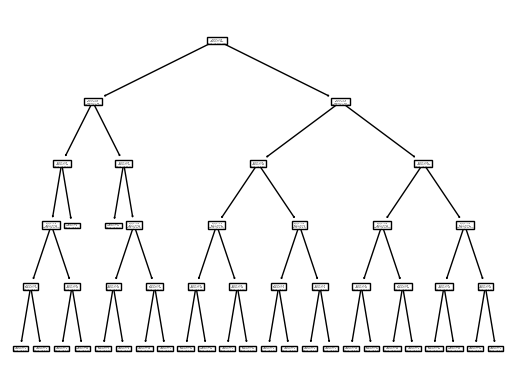

In [38]:
tree.plot_tree(model2)

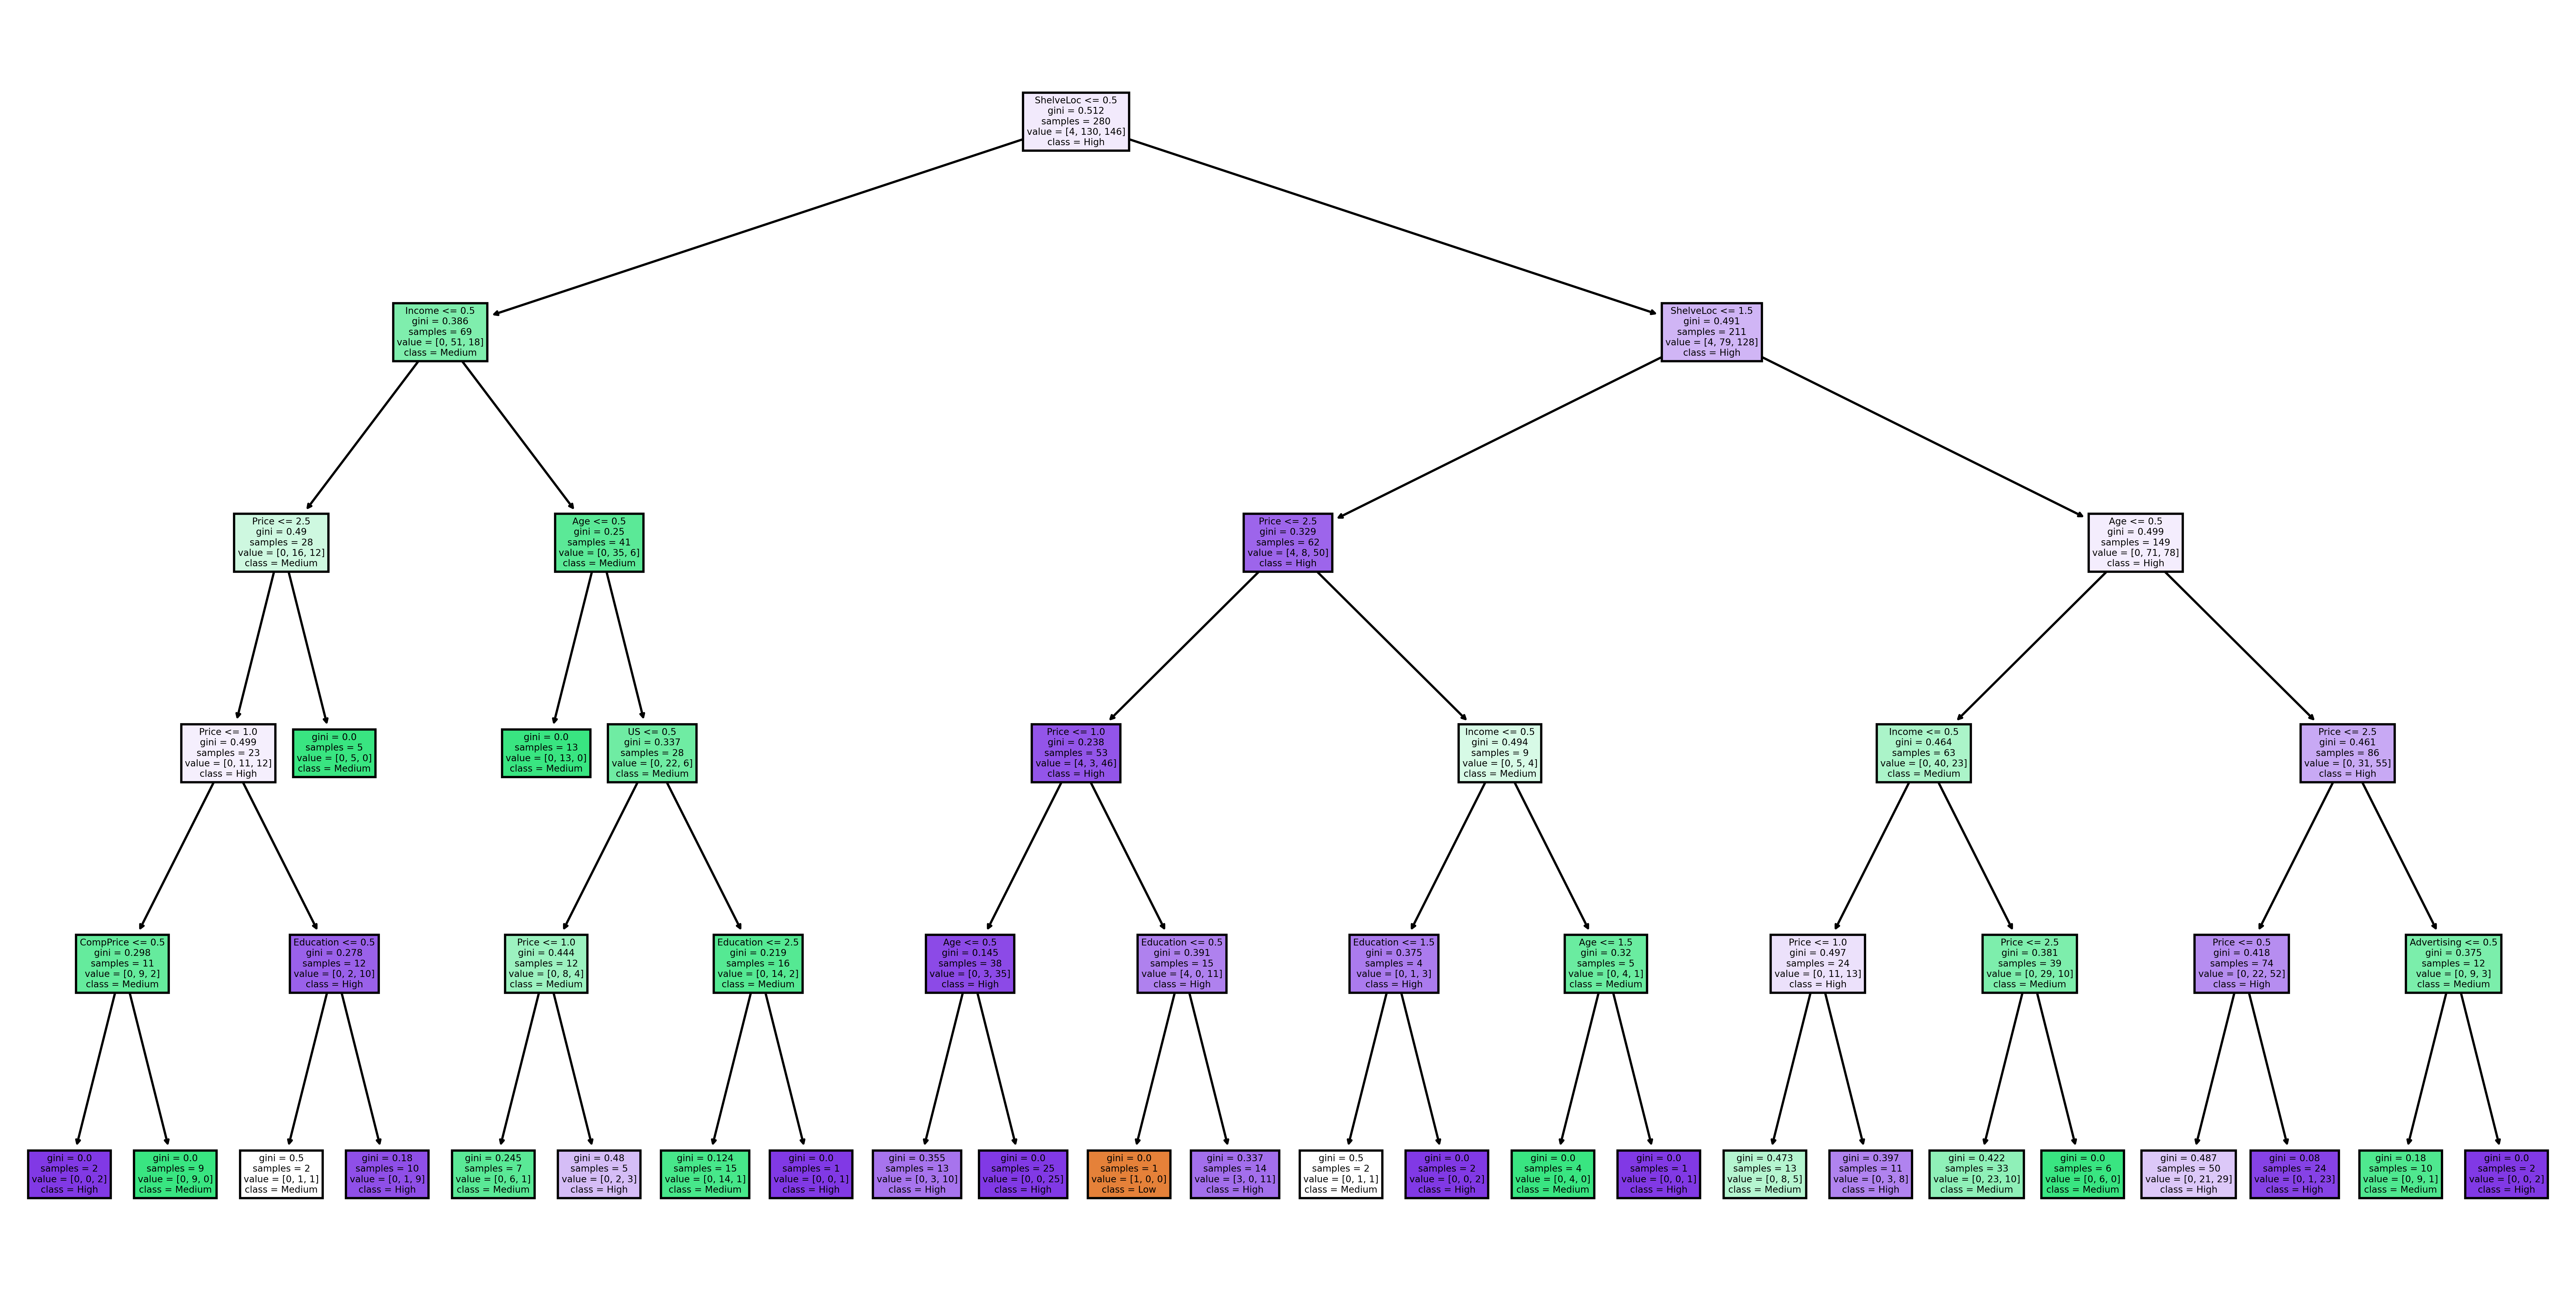

In [39]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=600)
tree.plot_tree(model2,feature_names = fn,class_names=cn,filled = True);



In [40]:
#checking accuracy training data
y_pred_train2 = model2.predict(x_train)
pd.Series(y_pred_train2).value_counts()

2    160
1    119
0      1
dtype: int64

In [41]:
metrics.accuracy_score(y_pred_train2,y_train)

0.8071428571428572

In [42]:
#checking accuracy testing data
y_pred_test2 = model2.predict(x_test)
pd.Series(y_pred_test2).value_counts()

2    66
1    52
0     2
dtype: int64

In [43]:
metrics.accuracy_score(y_pred_test2,y_test)



0.7333333333333333

In [44]:
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.73      0.70      0.72        54
           2       0.76      0.76      0.76        66

    accuracy                           0.73       120
   macro avg       0.50      0.49      0.49       120
weighted avg       0.75      0.73      0.74       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
confusion_matrix(y_test,y_pred_test2)

array([[ 0,  0,  0],
       [ 0, 38, 16],
       [ 2, 14, 50]])

In [46]:
model2.score(x_test, y_test)

0.7333333333333333

***model is 73% accurate for CART ALGORITHM ***